In [64]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [65]:
website_url = requests.get('https://www.basketball-reference.com/players/b/bealbr01/gamelog/2019')
soup = BeautifulSoup(website_url.content,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201904231" rel="dns-prefetch"/>
  <!-- no:cookie fast load the css.           -->
  <link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>
  <link crossorigin="" href="https://d2cwpp38twqe55.cloudfront.net" rel="preconnect"/>
  <style>
   html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;background:#c9cbcd;z-index:0;-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none}a img{border:0}ul,li,ol{margin:0;padding:0;list-style-type:none}table th,table td{border:0}iframe{max-width:10

In [66]:
My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
My_table

<table class="row_summable sortable stats_table" data-cols-to-freeze="3" id="pgl_basic"><caption>2018-19 Regular Season Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Season Game" class=" poptip center" data-stat="game_season" data-tip="Season Game" scope="col">G</th>
<th aria-label="Date" class=" poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>
<th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>
<th aria-label="Team" class=" poptip sort_default_asc

In [67]:
tabledata = My_table.findAll('td')
tabledata

[<td class="right endpoint tooltip" data-endpoint="/play-index/pgl_cum_stats.cgi?player=bealbr01&amp;year=2019&amp;date_game=2018-10-18&amp;is_playoff_game=N" data-stat="game_season"><strong>1</strong></td>,
 <td class="left " data-stat="date_game"><a href="/boxscores/201810180WAS.html">2018-10-18</a></td>,
 <td class="right " data-stat="age">25-112</td>,
 <td class="left " data-stat="team_id"><a href="/teams/WAS/2019.html">WAS</a></td>,
 <td class="center iz" data-stat="game_location"></td>,
 <td class="left " data-stat="opp_id"><a href="/teams/MIA/2019.html">MIA</a></td>,
 <td class="center " csk="-1" data-stat="game_result">L (-1)</td>,
 <td class="right " data-stat="gs">1</td>,
 <td class="right " csk="1631" data-stat="mp">27:11</td>,
 <td class="right " data-stat="fg">7</td>,
 <td class="right " data-stat="fga">16</td>,
 <td class="right " data-stat="fg_pct">.438</td>,
 <td class="right " data-stat="fg3">2</td>,
 <td class="right " data-stat="fg3a">7</td>,
 <td class="right " data

In [68]:
data = []
for cell in tabledata:
    data.append(cell.get_text())
    
print(data)

['1', '2018-10-18', '25-112', 'WAS', '', 'MIA', 'L (-1)', '1', '27:11', '7', '16', '.438', '2', '7', '.286', '4', '6', '.667', '0', '1', '1', '2', '1', '0', '1', '5', '20', '10.5', '-6', '2', '2018-10-20', '25-114', 'WAS', '', 'TOR', 'L (-4)', '1', '35:14', '12', '21', '.571', '6', '11', '.545', '2', '4', '.500', '0', '3', '3', '6', '1', '1', '1', '5', '32', '25.1', '+3', '3', '2018-10-22', '25-116', 'WAS', '@', 'POR', 'W (+1)', '1', '43:05', '10', '25', '.400', '5', '9', '.556', '0', '1', '.000', '1', '7', '8', '7', '0', '1', '0', '3', '25', '18.3', '+7', '4', '2018-10-24', '25-118', 'WAS', '@', 'GSW', 'L (-22)', '1', '19:25', '10', '15', '.667', '1', '4', '.250', '2', '2', '1.000', '0', '3', '3', '4', '1', '0', '0', '3', '23', '20.0', '-10', '5', '2018-10-26', '25-120', 'WAS', '@', 'SAC', 'L (-4)', '1', '39:01', '6', '19', '.316', '3', '11', '.273', '6', '6', '1.000', '0', '5', '5', '0', '2', '0', '5', '5', '21', '6.6', '-7', '6', '2018-10-28', '25-122', 'WAS', '@', 'LAC', 'L (-32)',

In [69]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))
refined

array([['1', '2018-10-18', '25-112', ..., '20', '10.5', '-6'],
       ['2', '2018-10-20', '25-114', ..., '32', '25.1', '+3'],
       ['3', '2018-10-22', '25-116', ..., '25', '18.3', '+7'],
       ...,
       ['80', '2019-04-05', '25-281', ..., '25', '17.0', '-11'],
       ['81', '2019-04-07', '25-283', ..., '13', '6.7', '+3'],
       ['82', '2019-04-09', '25-285', ..., '16', '15.8', '+8']],
      dtype='<U10')

In [70]:
tableheader = My_table.findAll('th')
tableheader

[<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>,
 <th aria-label="Season Game" class=" poptip center" data-stat="game_season" data-tip="Season Game" scope="col">G</th>,
 <th aria-label="Date" class=" poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>,
 <th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>,
 <th aria-label="Team" class=" poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>,
 <th aria-label=" " class=" poptip center" data-stat="game_location" scope="col"> </th>,
 <th aria-label="Opponent" class=" poptip sort_default_asc center" data-stat="opp_id" data-tip="Opponent" scope="col">Opp</th>,
 <th aria-label=" " class=" poptip center" data-stat="game_

In [71]:
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')    
print(headers)

['G', 'Date', 'Age', 'Tm', '\xa0', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [72]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [73]:
df1.tail()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
77,78,2019-03-31,25-276,WAS,@,DEN,W (+5),1,36:20,6,...,3,3,6,3,0,2,3,17,13.1,-10
78,79,2019-04-03,25-279,WAS,,CHI,L (-1),1,22:27,9,...,4,4,2,1,2,1,0,19,13.6,+5
79,80,2019-04-05,25-281,WAS,,SAS,L (-17),1,30:41,9,...,2,2,5,0,0,2,0,25,17.0,-11
80,81,2019-04-07,25-283,WAS,@,NYK,L (-3),1,23:26,5,...,3,3,5,1,0,1,2,13,6.7,+3
81,82,2019-04-09,25-285,WAS,,BOS,L (-6),1,16:32,6,...,3,5,4,0,0,0,0,16,15.8,+8


In [74]:
df1 = df1.drop(['\xa0', '\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,Opp,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,MIA,27:11,7,16,.438,2,7,.286,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,TOR,35:14,12,21,.571,6,11,.545,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,POR,43:05,10,25,.400,5,9,.556,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,GSW,19:25,10,15,.667,1,4,.250,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,SAC,39:01,6,19,.316,3,11,.273,...,5,5,0,2,0,5,5,21,6.6,-7


In [75]:
df1.columns

Index(['G', 'Date', 'Opp', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-'],
      dtype='object')

## Correlation Matrix

#### There are a lot of features to look at here, so we will will start our predictive analysis by looking at how features are correlated to each other, and what features are the most important for predicting future stats

In [177]:
df2 = df1.drop(['Date', 'Opp', 'MP', '+/-'], axis=1)

In [178]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,1,7,16,.438,2,7,.286,4,6,.667,0,1,1,2,1,0,1,5,10.5,20
1,2,12,21,.571,6,11,.545,2,4,.500,0,3,3,6,1,1,1,5,25.1,32
2,3,10,25,.400,5,9,.556,0,1,.000,1,7,8,7,0,1,0,3,18.3,25
3,4,10,15,.667,1,4,.250,2,2,1.000,0,3,3,4,1,0,0,3,20.0,23
4,5,6,19,.316,3,11,.273,6,6,1.000,0,5,5,0,2,0,5,5,6.6,21


In [179]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

AxesSubplot(0.127273,0.125;0.617727x0.755)


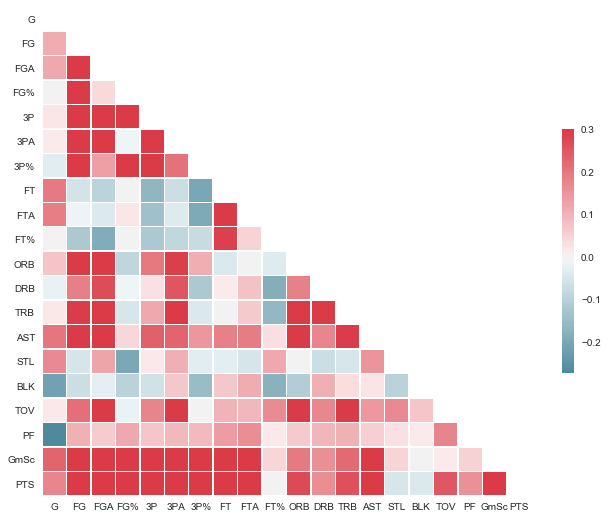

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [181]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,-0.841535,-1.386195,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,0.873660
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,-0.841535,-0.438962,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,-0.081542
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,-0.066188,1.455505,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.354456
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.841535,-0.438962,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.627371
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-0.841535,0.508272,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.763829


AxesSubplot(0.127273,0.125;0.617727x0.755)


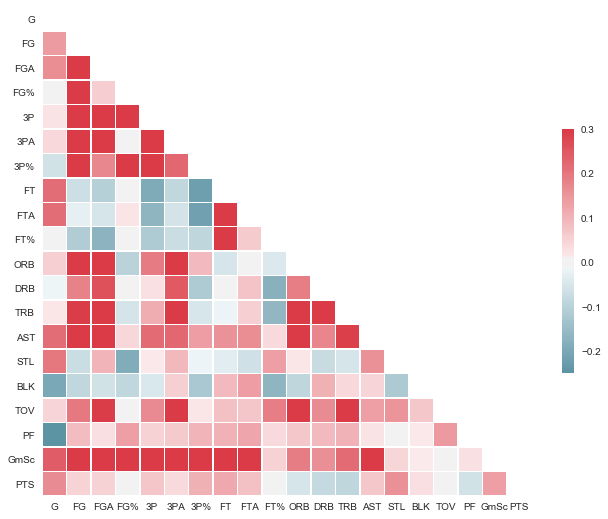

In [182]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

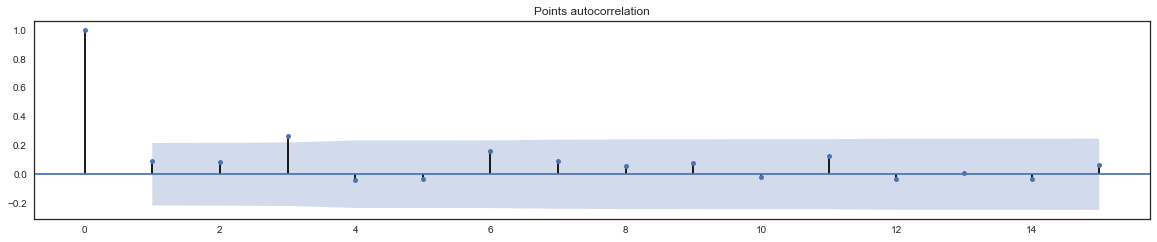

In [183]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

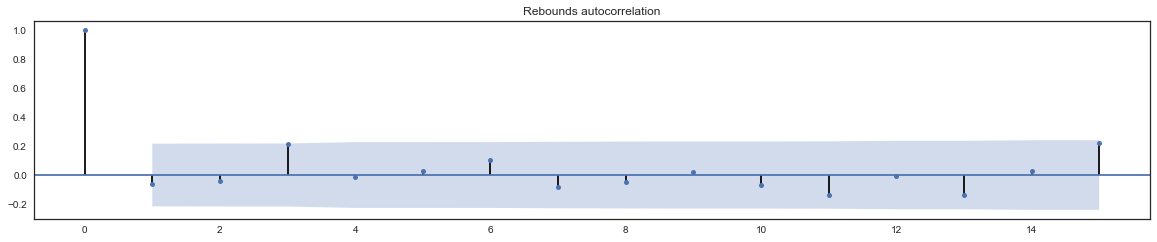

In [184]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

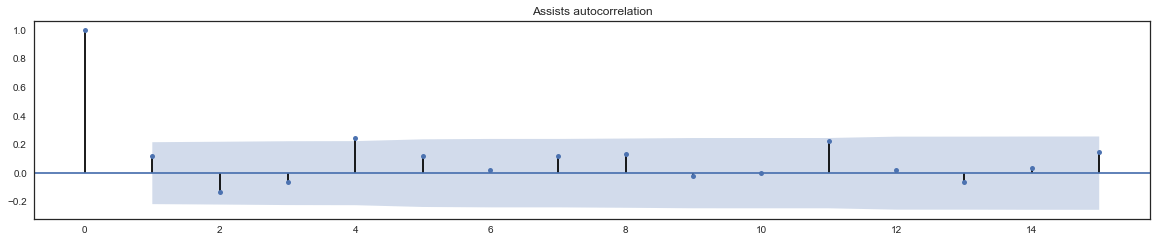

In [185]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

### Trend analysis

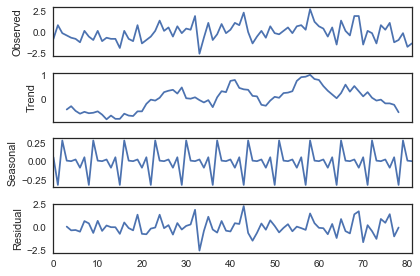

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

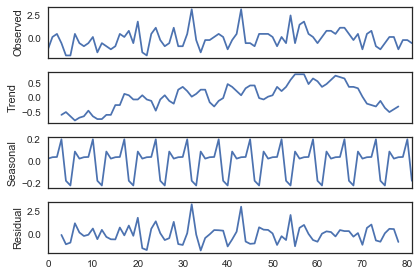

In [26]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

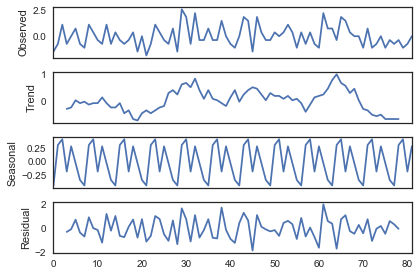

In [27]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [186]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']

In [187]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,...,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-1.162305,-0.763829,2018-10-18,MIA
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.818212,0.873660,2018-10-20,TOR
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.104220,-0.081542,2018-10-22,POR
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,0.126388,-0.354456,2018-10-24,GSW
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-1.691347,-0.627371,2018-10-26,SAC


In [89]:
#do MJ prediction/Do a team(GSW?) prediction/collegetoNBA

In [188]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Week'] = df2['Date'].dt.week
df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [189]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,GmSc,PTS,Date,Opp,Year,Month,Week,Yearday,Rest
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,1.526774,0.818212,0.873660,2018-10-20,TOR,2018,10,42,293,2.0
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0.165954,-0.104220,-0.081542,2018-10-22,POR,2018,10,43,295,2.0
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,0.165954,0.126388,-0.354456,2018-10-24,GSW,2018,10,43,297,2.0
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.526774,-1.691347,-0.627371,2018-10-26,SAC,2018,10,43,299,2.0
5,-1.499814,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.165954,-1.203000,-0.763829,2018-10-28,LAC,2018,10,43,301,2.0


In [190]:
df2 = df2.drop(['Date'], axis=1)

In [191]:
df2.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp',
       'Year', 'Month', 'Week', 'Yearday', 'Rest'],
      dtype='object')

In [192]:
#Do prediction for pts, reb, ast

In [193]:
df4 = df2.copy(deep=True)
df4['Opp'] = df4.Opp.shift(-1)
df4['Year'] = df4.Year.shift(-1)
df4['Month'] = df4.Month.shift(-1)
df4['Week'] = df4.Week.shift(-1)
df4['Yearday'] = df4.Yearday.shift(-1)
df4['Rest'] = df4.Rest.shift(-1)

In [194]:
BradleyBealStatLog = df4.copy(deep=True)
BradleyBealStatLog.to_csv('BradleyBealStatLog.csv')

In [195]:
dum1 = pd.get_dummies(df4['Opp'])
df4 = pd.concat([df4, dum1], axis=1)
df4 = df4.drop(['Opp'], axis=1)

In [196]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [197]:
df4 = df4.drop(['DRB', 'TRB','ORB','PF','TOV'], axis=1)
#df4 = df4.drop(['3PA', '3P'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
df4.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PHI,PHO,POR,SAC,SAS,TOR,UTA,PredPts,PredTrb,PredAst
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,0,0,1,0,0,0,0,-0.081542,1.120545,0.511368
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0,0,0,0,0,0,0,-0.354456,-0.754653,-0.487017
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,0,0,0,1,0,0,0,-0.627371,-0.004574,-1.818196
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,0,0,0,0,0,0,0,-0.763829,0.745506,-1.818196
5,-1.499814,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0,0,0,0,0,0,0,-1.173201,-0.754653,0.511368


In [198]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.9))] 
test=df4[(round(len(df4)*.9 - 1)):]
trains = np.split(train, [49], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [49], axis=1)
test_y=tests[1]
test_x=tests[0]

In [203]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-0.081542,1.120545,0.511368
2,-0.354456,-0.754653,-0.487017
3,-0.627371,-0.004574,-1.818196
4,-0.763829,0.745506,-1.818196
5,-1.173201,-0.754653,0.511368


In [200]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [166]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([ 4.62781457e-01,  1.02871476e+00, -1.59583974e+00, -2.10085860e+00,
        5.88147924e-01, -8.38322123e-01, -5.21991958e-02,  1.59410472e+00,
       -2.34882568e+00, -3.64198669e-01, -9.83325465e-02, -1.62078793e-01,
       -1.58320654e-03,  2.36299457e-01,  1.60657603e+00, -5.85198484e+00,
        5.41615981e-01,  7.37251353e-01, -1.42780738e-01,  1.61114223e-01,
        4.25525833e-02, -9.16631253e-02,  1.21025840e-01, -3.71848777e-01,
        3.99353589e-01,  5.48709771e-01, -1.77305842e-01,  2.19805189e+00,
       -6.90084388e-01, -2.58553236e+00,  2.29004919e+00, -4.39870919e-01,
       -7.25369246e-01, -2.20662877e-01,  3.44427447e-01, -5.28047718e-01,
       -4.89630080e-01,  2.14624003e-01, -6.56532148e-01, -2.11281843e-01,
       -2.74979523e-01,  1.04751388e+00,  5.54817603e-01,  3.17682952e+00,
       -1.34389531e+00,  1.22342693e+00, -1.27534242e+00, -2.80075037e-03,
       -2.07653493e+00])

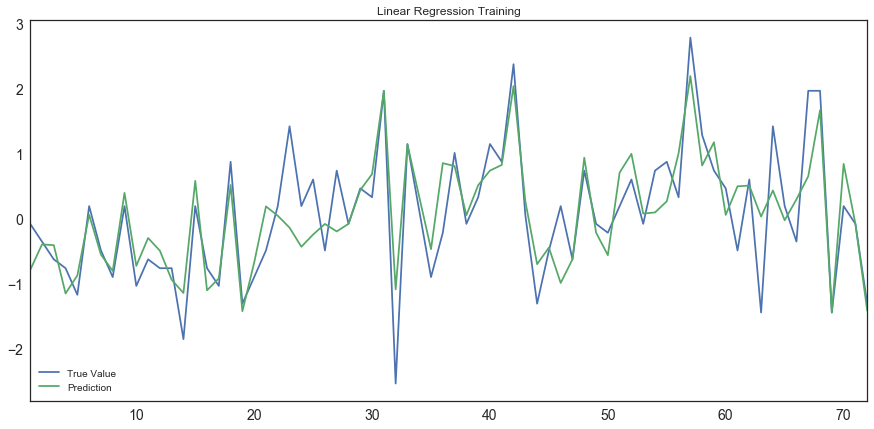

adj train r^2 = -0.0604650137589644
train mse = 0.31837295780088204


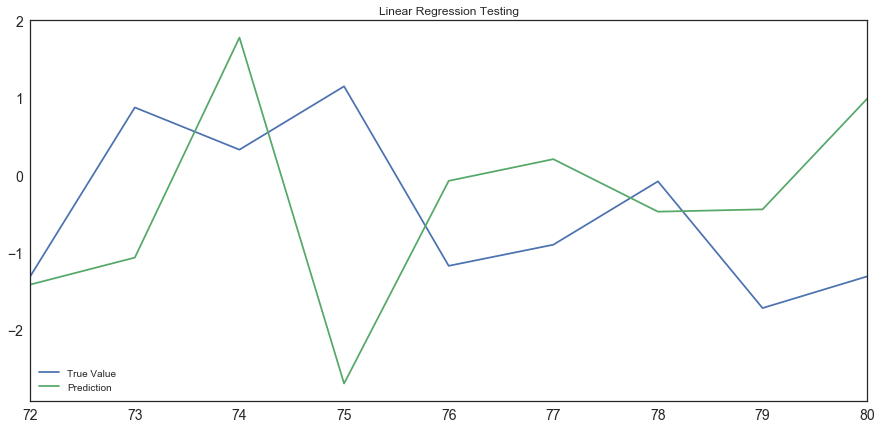

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'GmSc', 'PTS', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -10.33461293730351
test mse = 3.345653049831461


In [167]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Extra Trees

In [104]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

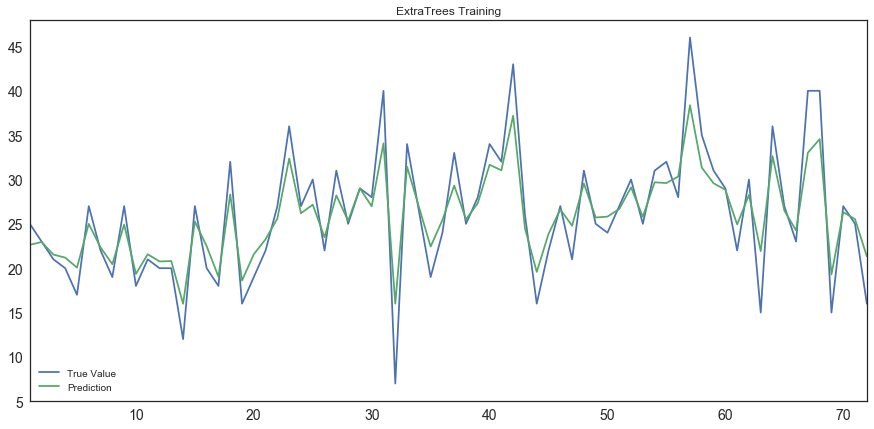

adj train r^2 = 0.44328917646045574
train mse = 8.975843859154931


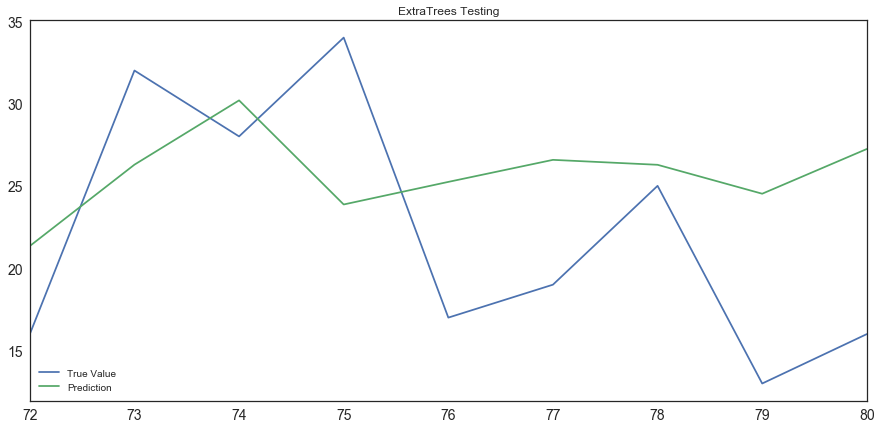

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -2.8875429275700943
test mse = 61.62475455555557


In [105]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

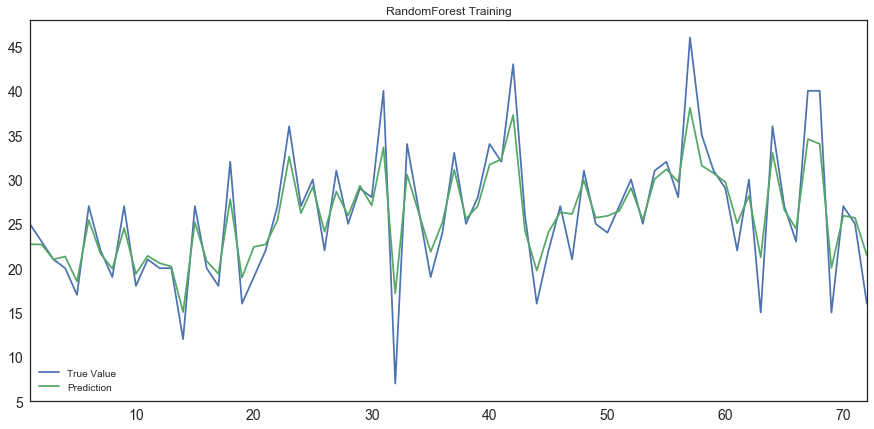

adj train r^2 = 0.449652198102761
train mse = 8.873252915492959


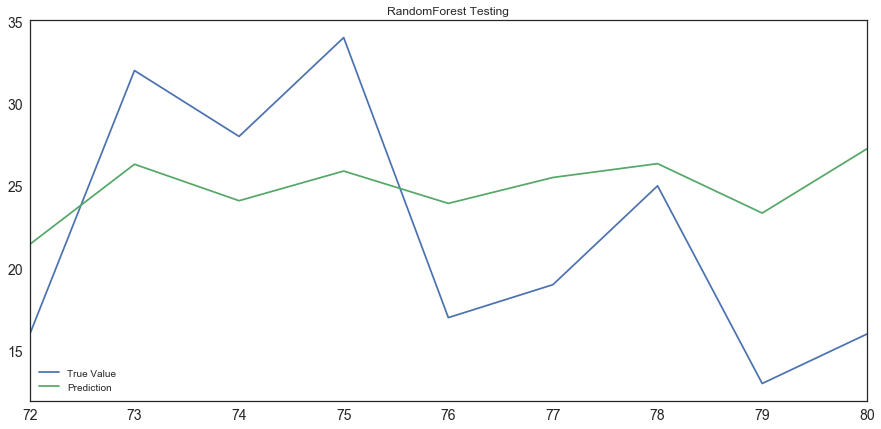

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -2.284624537383178
test mse = 52.067381555555556


In [107]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### XGBoost

In [108]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

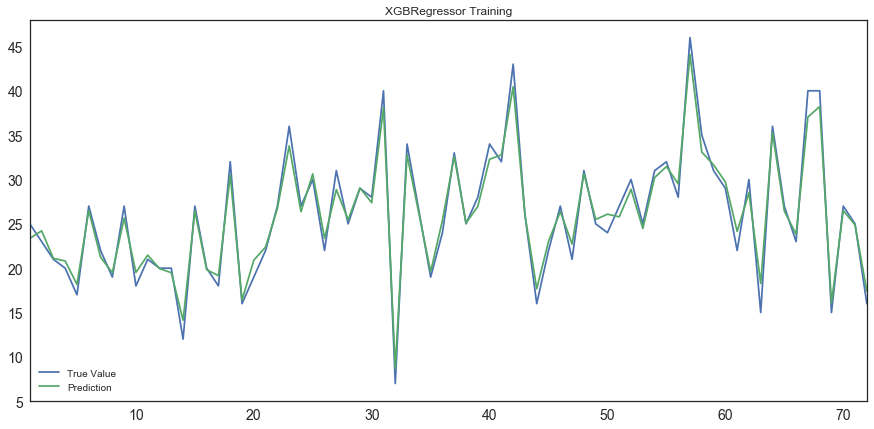

adj train r^2 = 0.8954365866705548
train mse = 1.6858750211791298


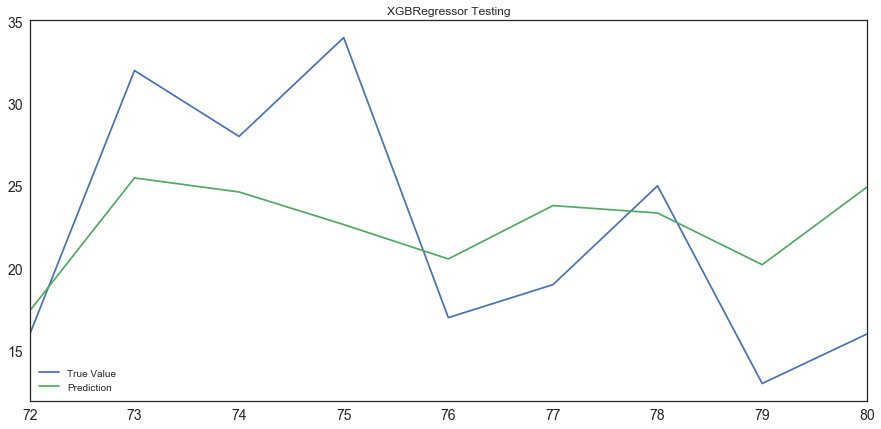

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -1.4862696837955696
test mse = 39.41197869127791


In [109]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Neural Net

In [168]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [201]:
model = Sequential()
model.add(Dense(1280, input_dim=49, activation='tanh'))
#model.add(Dropout(0.003))
#model.add(Dense(640, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(200, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/500
71/71 [==============================] - 0s 6ms/step - loss: 4.2608 - val_loss: 1.1587
Epoch 2/500
71/71 [==============================] - 0s 194us/step - loss: 3.0047 - val_loss: 1.0111
Epoch 3/500
71/71 [==============================] - 0s 188us/step - loss: 1.0415 - val_loss: 2.3490
Epoch 4/500
71/71 [==============================] - 0s 231us/step - loss: 1.2400 - val_loss: 2.1076
Epoch 5/500
71/71 [==============================] - 0s 238us/step - loss: 1.0802 - val_loss: 1.2975
Epoch 6/500
71/71 [==============================] - 0s 252us/step - loss: 1.0280 - val_loss: 1.0989
Epoch 7/500
71/71 [==============================] - 0s 193us/step - loss: 1.0551 - val_loss: 1.4003
Epoch 8/500
71/71 [==============================] - 0s 221us/step - loss: 0.9121 - val_loss: 1.8371
Epoch 9/500
71/71 [==============================] - 0s 215us/step - loss: 0.9304 - val_loss: 1.6720
Epoch 10/500
71/71 [==============================

71/71 [==============================] - 0s 183us/step - loss: 0.8730 - val_loss: 1.0382
Epoch 82/500
71/71 [==============================] - 0s 171us/step - loss: 0.8700 - val_loss: 1.1240
Epoch 83/500
71/71 [==============================] - 0s 197us/step - loss: 0.8622 - val_loss: 1.0296
Epoch 84/500
71/71 [==============================] - 0s 201us/step - loss: 0.8602 - val_loss: 1.0674
Epoch 85/500
71/71 [==============================] - 0s 183us/step - loss: 0.8643 - val_loss: 0.9743
Epoch 86/500
71/71 [==============================] - 0s 215us/step - loss: 0.8622 - val_loss: 1.0697
Epoch 87/500
71/71 [==============================] - 0s 198us/step - loss: 0.8667 - val_loss: 0.9598
Epoch 88/500
71/71 [==============================] - 0s 177us/step - loss: 0.8588 - val_loss: 1.0842
Epoch 89/500
71/71 [==============================] - 0s 224us/step - loss: 0.8561 - val_loss: 0.9340
Epoch 90/500
71/71 [==============================] - 0s 219us/step - loss: 0.8504 - val_loss: 

Epoch 161/500
71/71 [==============================] - 0s 176us/step - loss: 0.8120 - val_loss: 0.5848
Epoch 162/500
71/71 [==============================] - 0s 188us/step - loss: 0.8364 - val_loss: 0.6066
Epoch 163/500
71/71 [==============================] - 0s 179us/step - loss: 0.8203 - val_loss: 0.5641
Epoch 164/500
71/71 [==============================] - 0s 172us/step - loss: 0.8419 - val_loss: 0.6434
Epoch 165/500
71/71 [==============================] - 0s 182us/step - loss: 0.8103 - val_loss: 0.5669
Epoch 166/500
71/71 [==============================] - 0s 225us/step - loss: 0.8658 - val_loss: 0.6355
Epoch 167/500
71/71 [==============================] - 0s 197us/step - loss: 0.8404 - val_loss: 0.5251
Epoch 168/500
71/71 [==============================] - 0s 195us/step - loss: 0.8587 - val_loss: 0.7440
Epoch 169/500
71/71 [==============================] - 0s 199us/step - loss: 0.8278 - val_loss: 0.5134
Epoch 170/500
71/71 [==============================] - 0s 222us/step - lo

71/71 [==============================] - 0s 210us/step - loss: 0.8052 - val_loss: 0.4539
Epoch 241/500
71/71 [==============================] - 0s 200us/step - loss: 0.8258 - val_loss: 0.4327
Epoch 242/500
71/71 [==============================] - 0s 203us/step - loss: 0.7986 - val_loss: 0.4355
Epoch 243/500
71/71 [==============================] - 0s 184us/step - loss: 0.8154 - val_loss: 0.4491
Epoch 244/500
71/71 [==============================] - 0s 176us/step - loss: 0.7974 - val_loss: 0.4251
Epoch 245/500
71/71 [==============================] - 0s 204us/step - loss: 0.8140 - val_loss: 0.4520
Epoch 246/500
71/71 [==============================] - 0s 219us/step - loss: 0.7970 - val_loss: 0.4223
Epoch 247/500
71/71 [==============================] - 0s 185us/step - loss: 0.8075 - val_loss: 0.4510
Epoch 248/500
71/71 [==============================] - 0s 183us/step - loss: 0.7969 - val_loss: 0.4197
Epoch 249/500
71/71 [==============================] - 0s 174us/step - loss: 0.8069 - v

71/71 [==============================] - 0s 208us/step - loss: 0.8209 - val_loss: 0.3835
Epoch 320/500
71/71 [==============================] - 0s 212us/step - loss: 0.7794 - val_loss: 0.3995
Epoch 321/500
71/71 [==============================] - 0s 204us/step - loss: 0.8292 - val_loss: 0.4021
Epoch 322/500
71/71 [==============================] - 0s 195us/step - loss: 0.7696 - val_loss: 0.4476
Epoch 323/500
71/71 [==============================] - 0s 212us/step - loss: 0.8710 - val_loss: 0.3990
Epoch 324/500
71/71 [==============================] - 0s 202us/step - loss: 0.7839 - val_loss: 0.3997
Epoch 325/500
71/71 [==============================] - 0s 182us/step - loss: 0.8436 - val_loss: 0.4403
Epoch 326/500
71/71 [==============================] - 0s 201us/step - loss: 0.7847 - val_loss: 0.3719
Epoch 327/500
71/71 [==============================] - 0s 186us/step - loss: 0.8215 - val_loss: 0.4884
Epoch 328/500
71/71 [==============================] - 0s 187us/step - loss: 0.7802 - v

71/71 [==============================] - 0s 186us/step - loss: 0.7493 - val_loss: 0.4032
Epoch 399/500
71/71 [==============================] - 0s 191us/step - loss: 0.7437 - val_loss: 0.3636
Epoch 400/500
71/71 [==============================] - 0s 202us/step - loss: 0.7516 - val_loss: 0.3901
Epoch 401/500
71/71 [==============================] - 0s 196us/step - loss: 0.7380 - val_loss: 0.3674
Epoch 402/500
71/71 [==============================] - 0s 214us/step - loss: 0.7433 - val_loss: 0.3913
Epoch 403/500
71/71 [==============================] - 0s 196us/step - loss: 0.7360 - val_loss: 0.3695
Epoch 404/500
71/71 [==============================] - 0s 200us/step - loss: 0.7389 - val_loss: 0.3828
Epoch 405/500
71/71 [==============================] - 0s 195us/step - loss: 0.7348 - val_loss: 0.3747
Epoch 406/500
71/71 [==============================] - 0s 221us/step - loss: 0.7353 - val_loss: 0.3790
Epoch 407/500
71/71 [==============================] - 0s 226us/step - loss: 0.7355 - v

71/71 [==============================] - 0s 192us/step - loss: 0.7212 - val_loss: 0.4007
Epoch 478/500
71/71 [==============================] - 0s 227us/step - loss: 0.6888 - val_loss: 0.3994
Epoch 479/500
71/71 [==============================] - 0s 218us/step - loss: 0.7037 - val_loss: 0.3847
Epoch 480/500
71/71 [==============================] - 0s 190us/step - loss: 0.7478 - val_loss: 0.3931
Epoch 481/500
71/71 [==============================] - 0s 200us/step - loss: 0.6788 - val_loss: 0.4092
Epoch 482/500
71/71 [==============================] - 0s 171us/step - loss: 0.7579 - val_loss: 0.3776
Epoch 483/500
71/71 [==============================] - 0s 259us/step - loss: 0.7289 - val_loss: 0.3856
Epoch 484/500
71/71 [==============================] - 0s 189us/step - loss: 0.7665 - val_loss: 0.4297
Epoch 485/500
71/71 [==============================] - 0s 185us/step - loss: 0.7109 - val_loss: 0.4548
Epoch 486/500
71/71 [==============================] - 0s 188us/step - loss: 0.7083 - v

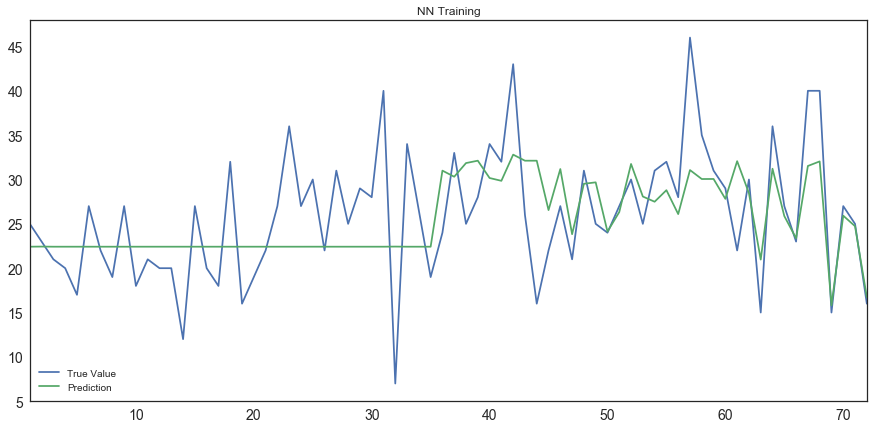

adj train r^2 = -1.4144210735793177
train mse = 0.7248578393430571


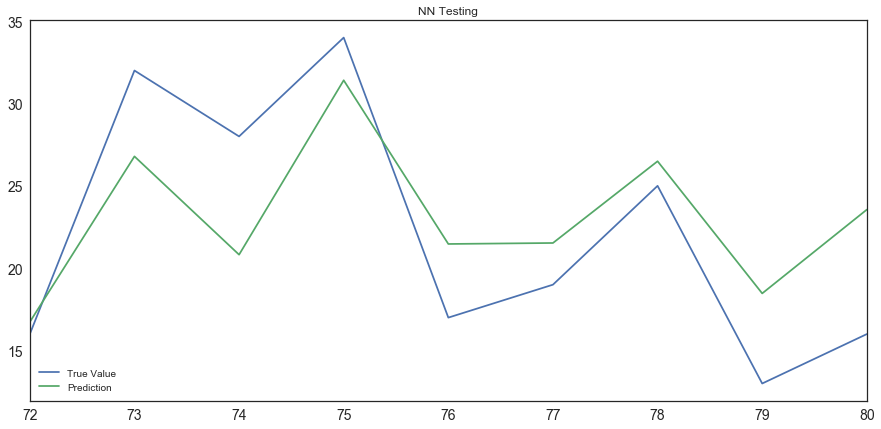

adj test r^2 = -0.4130925035812747
test mse = 22.400133019732795


In [202]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

In [206]:
test_y2.head()

,PredPts,PredTrb,PredAst,prediction
72,16.0,-0.754653,-0.819812,16.735666
73,32.0,-0.004574,-1.152607,26.787210
74,28.0,-1.129693,-0.487017,20.820551
75,34.0,-0.379613,0.178573,31.407656
76,17.0,-0.754653,0.178573,21.470268


### LSTM

In [211]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [212]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh'))
#model_lstm.add(LSTM(60, activation='relu',return_sequences=True))
#model_lstm.add(LSTM(60, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(LSTM(60, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=500, verbose=1, shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/500
71/71 [==============================] - 1s 20ms/step - loss: 1.0863 - val_loss: 1.7114
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9930 - val_loss: 1.6532
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9607 - val_loss: 1.3410
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9520 - val_loss: 1.2246
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9479 - val_loss: 1.2434
Epoch 6/500
71/71 [==============================] - 0s 3ms/step - loss: 0.9270 - val_loss: 1.3566
Epoch 7/500
71/71 [==============================] - 0s 3ms/step - loss: 0.9134 - val_loss: 1.3874
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9092 - val_loss: 1.3754
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9107 - val_loss: 1.4079
Epoch 10/500
71/71 [==============================] - 0s 2ms/step

71/71 [==============================] - 0s 2ms/step - loss: 0.8865 - val_loss: 1.2971
Epoch 83/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8857 - val_loss: 1.3250
Epoch 84/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8841 - val_loss: 1.2667
Epoch 85/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8871 - val_loss: 1.2503
Epoch 86/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8837 - val_loss: 1.3170
Epoch 87/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8842 - val_loss: 1.3328
Epoch 88/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8833 - val_loss: 1.2552
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8837 - val_loss: 1.3026
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8874 - val_loss: 1.3427
Epoch 91/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8883 - val_loss: 1.2052
Epoch 92/500


71/71 [==============================] - 0s 3ms/step - loss: 0.8444 - val_loss: 1.0360
Epoch 164/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8476 - val_loss: 0.9614
Epoch 165/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8451 - val_loss: 0.8854
Epoch 166/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8415 - val_loss: 1.0012
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8445 - val_loss: 0.9250
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8407 - val_loss: 0.9165
Epoch 169/500
71/71 [==============================] - 0s 3ms/step - loss: 0.8499 - val_loss: 0.9770
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8393 - val_loss: 0.8981
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8451 - val_loss: 0.9453
Epoch 172/500
71/71 [==============================] - 0s 3ms/step - loss: 0.8462 - val_loss: 0.9257
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.8188 - val_loss: 0.7139
Epoch 245/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8129 - val_loss: 0.6288
Epoch 246/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8093 - val_loss: 0.6328
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8135 - val_loss: 0.6747
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8118 - val_loss: 0.6272
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8149 - val_loss: 0.6466
Epoch 250/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8167 - val_loss: 0.6287
Epoch 251/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8118 - val_loss: 0.6477
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8234 - val_loss: 0.6735
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8109 - val_loss: 0.6057
Epoc

71/71 [==============================] - 0s 3ms/step - loss: 0.8094 - val_loss: 0.4919
Epoch 326/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8054 - val_loss: 0.5543
Epoch 327/500
71/71 [==============================] - 0s 3ms/step - loss: 0.8213 - val_loss: 0.5404
Epoch 328/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8124 - val_loss: 0.5039
Epoch 329/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8056 - val_loss: 0.5017
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8047 - val_loss: 0.5547
Epoch 331/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8075 - val_loss: 0.5233
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8017 - val_loss: 0.4980
Epoch 333/500
71/71 [==============================] - 0s 3ms/step - loss: 0.8075 - val_loss: 0.4993
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8032 - val_loss: 0.4889
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.8094 - val_loss: 0.4453
Epoch 407/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8022 - val_loss: 0.4215
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8023 - val_loss: 0.4363
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8004 - val_loss: 0.4739
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8070 - val_loss: 0.4905
Epoch 411/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8046 - val_loss: 0.4574
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7966 - val_loss: 0.4264
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7930 - val_loss: 0.4244
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7968 - val_loss: 0.4251
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7994 - val_loss: 0.4277
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.7955 - val_loss: 0.4103
Epoch 488/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7972 - val_loss: 0.4098
Epoch 489/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8001 - val_loss: 0.4145
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7959 - val_loss: 0.4165
Epoch 491/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7955 - val_loss: 0.4124
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7949 - val_loss: 0.4079
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7936 - val_loss: 0.4076
Epoch 494/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7977 - val_loss: 0.4269
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7989 - val_loss: 0.4329
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7978 - val_loss: 0.4218
Epoc

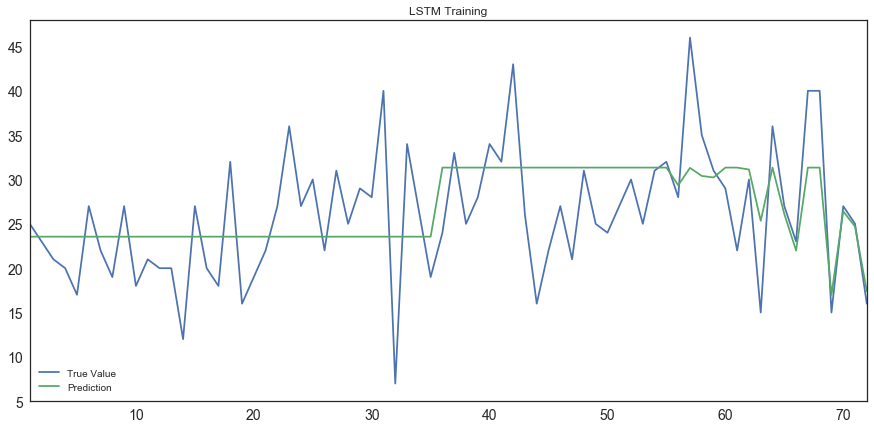

adj train r^2 = -1.6405793388231928
train mse = 0.792755106016274


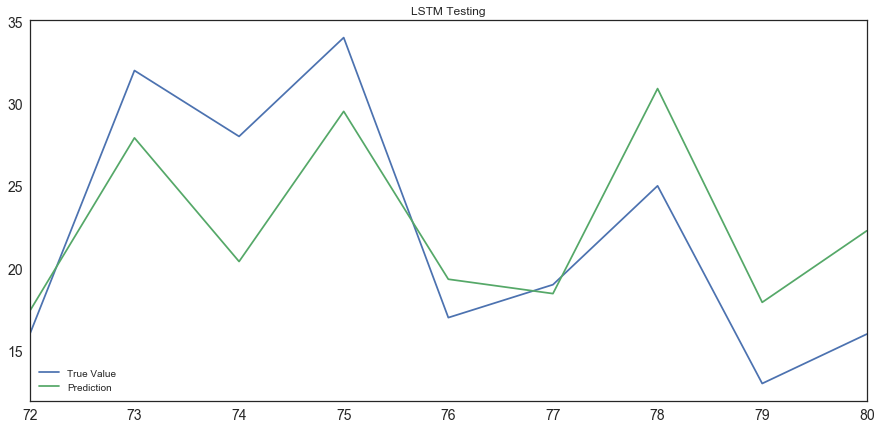

adj test r^2 = -0.4063017624977334
test mse = 22.292487198112212


In [213]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

In [214]:
test_y2.head()

,PredPts,PredTrb,PredAst,prediction
72,16.0,-0.754653,-0.819812,17.404043
73,32.0,-0.004574,-1.152607,27.911312
74,28.0,-1.129693,-0.487017,20.405653
75,34.0,-0.379613,0.178573,29.520416
76,17.0,-0.754653,0.178573,19.330149


### TPOT

In [215]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=5, verbosity=2, config_dict='TPOT')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())

Generation 1 - Current best internal CV score: -1.0181591297825032
Generation 2 - Current best internal CV score: -1.0180628740214246
Generation 3 - Current best internal CV score: -1.0173772919191422
Generation 4 - Current best internal CV score: -0.9733426544919233
Generation 5 - Current best internal CV score: -0.9733426544919233
Generation 6 - Current best internal CV score: -0.9733426544919233
Generation 7 - Current best internal CV score: -0.9733426544919233
Generation 8 - Current best internal CV score: -0.9733426544919233
Generation 9 - Current best internal CV score: -0.9733426544919233
Generation 10 - Current best internal CV score: -0.9733426544919233
Generation 11 - Current best internal CV score: -0.9733426544919233
Generation 12 - Current best internal CV score: -0.9733426544919233
Generation 13 - Current best internal CV score: -0.959470813102886
Generation 14 - Current best internal CV score: -0.959470813102886
Generation 15 - Current best internal CV score: -0.95947081

Generation 122 - Current best internal CV score: -0.9079299651148112
Generation 123 - Current best internal CV score: -0.9079299651148112
Generation 124 - Current best internal CV score: -0.9079299651148112
Generation 125 - Current best internal CV score: -0.9079299651148112
Generation 126 - Current best internal CV score: -0.9079299651148112
Generation 127 - Current best internal CV score: -0.9079299651148112
Generation 128 - Current best internal CV score: -0.9079299651148112
Generation 129 - Current best internal CV score: -0.9079299651148112
Generation 130 - Current best internal CV score: -0.9079299651148112
Generation 131 - Current best internal CV score: -0.9079299651148112
Generation 132 - Current best internal CV score: -0.9079299651148112
Generation 133 - Current best internal CV score: -0.9079299651148112
Generation 134 - Current best internal CV score: -0.9079299651148112
Generation 135 - Current best internal CV score: -0.9079299651148112
Generation 136 - Current best inte

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=10, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

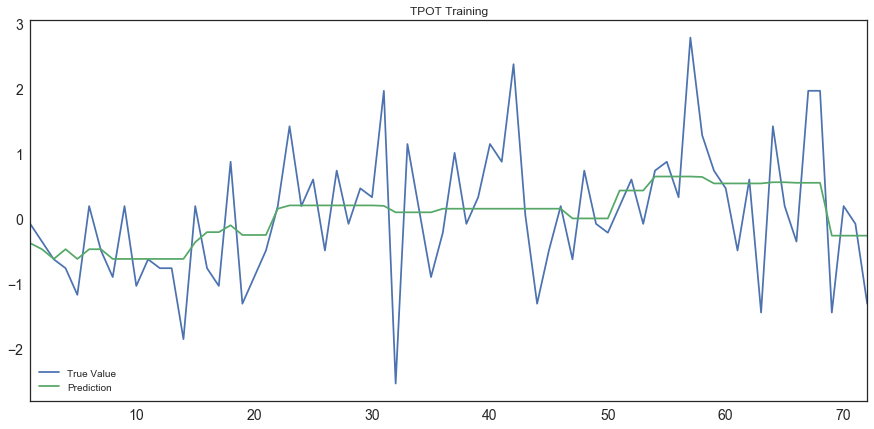

adj train r^2 = -1.4368550704281149
train mse = 0.7315929770792188


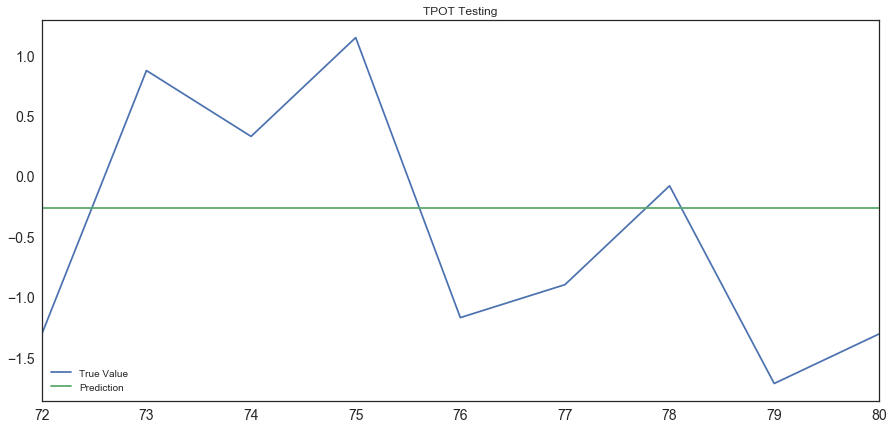

adj test r^2 = -2.4652239668874696
test mse = 1.0228348508497198


In [216]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, train_y2.prediction)))
test_y['PredPts'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))